Mahalanobis Distance

In [234]:
# reading the dataset glass.csv
import pandas as pd
import numpy as np

glass = pd.read_csv("glass.csv")

glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [235]:
# remove type 
glass = glass.drop('Type', axis=1)
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [236]:
glass.tail()

RI     Na   Mg    Al     Si     K    Ca    Ba   Fe
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0

In [237]:
print(glass.shape   )

(214, 9)


In [238]:
# Implementing mahalanobis distance

# mean
mean = glass.mean()
mean = np.array(mean)
print(mean)

# covariance matrix
cov = glass.cov()
cov = np.array(cov)
cov = np.linalg.inv(cov)
print(cov.shape)

# adding mahalanobis distance to each entry 
md = []
for i in range(len(glass)):
    md.append(np.sqrt((glass.iloc[i]-mean)@cov@(glass.iloc[i]-mean).T))
glass['md'] = md
glass.head()


[1.51836542e+00 1.34078505e+01 2.68453271e+00 1.44490654e+00
 7.26509346e+01 4.97056075e-01 8.95696262e+00 1.75046729e-01
 5.70093458e-02]
(9, 9)


RI     Na    Mg    Al     Si     K    Ca   Ba   Fe        md
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0  2.193131
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0  1.599188
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0  1.383507
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0  2.502891
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0  1.345504

In [239]:
glass.tail()

RI     Na   Mg    Al     Si     K    Ca    Ba   Fe        md
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0  3.579469
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0  3.220495
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0  5.009881
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0  3.348426
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0  3.335046

In [240]:
print(max(glass['md']))
print(min(glass['md']))


9.354756980032121
0.7929436430605727


In [241]:
# the below code is referecd from https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe  
from IPython.display import display
glass = glass.sort_values(by=['md'], ascending=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(glass)

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe        md
54   1.51778  13.21  2.81  1.29  72.98  0.51   9.02  0.00  0.09  0.792944
42   1.51779  13.21  3.39  1.33  72.76  0.59   8.59  0.00  0.00  0.972700
29   1.51784  13.08  3.49  1.28  72.86  0.60   8.49  0.00  0.00  1.045206
99   1.51811  12.96  2.96  1.43  72.92  0.60   8.79  0.14  0.00  1.051414
87   1.51645  13.40  3.49  1.52  72.65  0.67   8.08  0.00  0.10  1.064035
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.00  0.00  1.128879
83   1.51594  13.09  3.52  1.55  72.87  0.68   8.05  0.00  0.09  1.138097
140  1.51690  13.33  3.54  1.61  72.54  0.68   8.11  0.00  0.00  1.160324
26   1.51793  13.21  3.48  1.41  72.64  0.59   8.43  0.00  0.00  1.176648
73   1.51631  13.34  3.57  1.57  72.87  0.61   7.89  0.00  0.00  1.192144
60   1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.00  0.00  1.198391
116  1.51829  13.24  3.90  1.41  72.33  0.55   8.31  0.00  0.10  1.203158
82   1.51646  13.41  3.55  1.25  72.81  0.68   8.10  0.00  0.00  1.205309
132  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00  1.225757
52   1.51808  13.43  2.87  1.19  72.84  0.55   9.03  0.00  0.00  1.242855
81   1.51593  13.25  3.45  1.43  73.17  0.61   7.86  0.00  0.00  1.264580
53   1.51837  13.14  2.84  1.28  72.85  0.55   9.07  0.00  0.00  1.274162
122  1.51687  13.23  3.54  1.48  72.84  0.56   8.10  0.00  0.00  1.275478
115  1.51846  13.41  3.89  1.33  72.38  0.51   8.28  0.00  0.00  1.278733
72   1.51593  13.09  3.59  1.52  73.10  0.67   7.83  0.00  0.00  1.286599
85   1.51625  13.36  3.58  1.49  72.72  0.45   8.21  0.00  0.00  1.327249
59   1.51754  13.39  3.66  1.19  72.79  0.57   8.27  0.00  0.11  1.336842
4    1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00  1.345504
37   1.51797  12.74  3.48  1.35  72.96  0.64   8.68  0.00  0.00  1.348477
34   1.51783  12.69  3.54  1.34  72.95  0.57   8.75  0.00  0.00  1.364476
45   1.51900  13.49  3.48  1.35  71.95  0.55   9.00  0.00  0.00  1.366856
74   1.51596  13.02  3.56  1.54  73.11  0.72   7.90  0.00  0.00  1.369564
93   1.51590  13.24  3.34  1.47  73.10  0.39   8.22  0.00  0.00  1.376342
134  1.51811  13.33  3.85  1.25  72.78  0.52   8.12  0.00  0.00  1.379833
177  1.51937  13.79  2.41  1.19  72.76  0.00   9.77  0.00  0.00  1.381369
2    1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.00  1.383507
6    1.51743  13.30  3.60  1.14  73.09  0.58   8.17  0.00  0.00  1.396846
86   1.51569  13.24  3.49  1.47  73.25  0.38   8.03  0.00  0.00  1.403422
146  1.51769  13.65  3.66  1.11  72.77  0.11   8.60  0.00  0.00  1.433469
22   1.51736  12.78  3.62  1.29  72.79  0.59   8.70  0.00  0.00  1.438479
40   1.51793  12.79  3.50  1.12  73.03  0.64   8.77  0.00  0.00  1.447187
120  1.51844  13.25  3.76  1.32  72.40  0.58   8.42  0.00  0.00  1.457812
123  1.51707  13.48  3.48  1.71  72.52  0.62   7.99  0.00  0.00  1.459271
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11  1.463797
75   1.51590  13.02  3.58  1.51  73.12  0.69   7.96  0.00  0.00  1.485896
114  1.51847  13.10  3.97  1.19  72.44  0.60   8.43  0.00  0.00  1.490740
41   1.51755  12.71  3.42  1.20  73.20  0.59   8.64  0.00  0.00  1.507796
49   1.51898  13.58  3.35  1.23  72.08  0.59   8.91  0.00  0.00  1.508968
25   1.51764  12.98  3.54  1.21  73.00  0.65   8.53  0.00  0.00  1.509641
155  1.51646  13.04  3.40  1.26  73.01  0.52   8.58  0.00  0.00  1.515576
125  1.51872  12.93  3.66  1.56  72.51  0.58   8.55  0.00  0.12  1.518988
31   1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00  1.529635
15   1.51761  12.81  3.54  1.23  73.24  0.58   8.39  0.00  0.00  1.544988
27   1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.00  0.00  1.553659
46   1.51869  13.19  3.37  1.18  72.72  0.57   8.83  0.00  0.16  1.566840
18   1.51911  13.90  3.73  1.18  72.12  0.06   8.89  0.00  0.00  1.576328
11   1.51763  12.80  3.66  1.27  73.01  0.60   8.56  0.00  0.00  1.576574
160  1.51832  13.33  3.34  1.54  72.14  0.56   8.99  0.00  0.00  1.581542
7    1.51756  

###### THEORY OF METHOD USED FURTHER:

###### OTSU THRESHOLDING FOR MAHALANOBIS DISTANCE
###### method reference: https://muthu.co/otsus-method-for-image-thresholding-explained-and-implemented/

###### sigma(t)^2 = w0(t)*sigma0(t)^2 + w1(t)*sigma1(t)^2
###### w0(t) represents the probability of number of pixels in class 0 at threshold t
###### w1(t) represents the probability of number of pixels in class 1 at threshold t
###### sigma(t)^2 is the variance of the image at threshold t
###### Pall = total number of pixels in the image
###### P0(t) = number of pixels in class 0 at threshold t
###### P1(t) = number of pixels in class 1 at threshold t
###### w0 = P0/Pall
###### w1 = P1/Pall
###### N = number of pixels in the image
###### We are minimizing the sigma function 

In [242]:
def get_sigma(glass , threshold): 
    Pall = len(glass)
    P0 = len(glass[glass['md'] < threshold]) # number of pixels in class 0
    P1 = len(glass[glass['md'] >= threshold]) # number of pixels in class 1
    w0 = P0 / Pall
    w1 = P1 / Pall
    sigma0_2 = glass[glass['md'] < threshold]['md'].var()
    sigma1_2 = np.var(glass[glass['md'] >= threshold]['md'])
    sigma_2 = w0 * sigma0_2 + w1 * sigma1_2 
    return sigma_2

# finding the threshold that minimizes the variance
min_sigma = 100000
otsu = 0
for i in range(3, 96, 1):
    threshold = i/10
    sigma = get_sigma(glass, threshold)
    if sigma < min_sigma:
        min_sigma = sigma
        otsu = threshold
print("Otsu threshold:", (otsu))
# print("Minimum sigma:", min_sigma)

Otsu threshold: 3.9


In [243]:
n_outliers = len(glass[glass['md'] > otsu])
print("Number of outliers:", n_outliers)

Number of outliers: 29


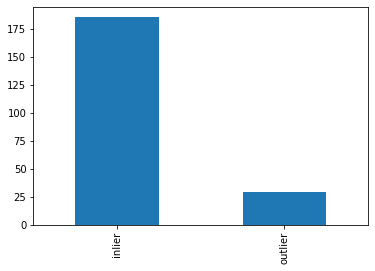

In [244]:
import matplotlib.pyplot as plt

glass['outlier'] = glass['md'].apply(lambda x: 'outlier' if x > otsu else 'inlier')
glass['outlier'].value_counts().plot(kind='bar')
plt.show()

In [245]:
glass['outlier'] = glass['md'].apply(lambda x: 'outlier' if x > otsu else 'inlier')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(glass)

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe        md  \
54   1.51778  13.21  2.81  1.29  72.98  0.51   9.02  0.00  0.09  0.792944   
42   1.51779  13.21  3.39  1.33  72.76  0.59   8.59  0.00  0.00  0.972700   
29   1.51784  13.08  3.49  1.28  72.86  0.60   8.49  0.00  0.00  1.045206   
99   1.51811  12.96  2.96  1.43  72.92  0.60   8.79  0.14  0.00  1.051414   
87   1.51645  13.40  3.49  1.52  72.65  0.67   8.08  0.00  0.10  1.064035   
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.00  0.00  1.128879   
83   1.51594  13.09  3.52  1.55  72.87  0.68   8.05  0.00  0.09  1.138097   
140  1.51690  13.33  3.54  1.61  72.54  0.68   8.11  0.00  0.00  1.160324   
26   1.51793  13.21  3.48  1.41  72.64  0.59   8.43  0.00  0.00  1.176648   
73   1.51631  13.34  3.57  1.57  72.87  0.61   7.89  0.00  0.00  1.192144   
60   1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.00  0.00  1.198391   
116  1.51829  13.24  3.90  1.41  72.33  0.55   8.31  0.00  0.10  1.203158   
82   1.51646  13.41  3.55  1.25  72.81  0.68   8.10  0.00  0.00  1.205309   
132  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00  1.225757   
52   1.51808  13.43  2.87  1.19  72.84  0.55   9.03  0.00  0.00  1.242855   
81   1.51593  13.25  3.45  1.43  73.17  0.61   7.86  0.00  0.00  1.264580   
53   1.51837  13.14  2.84  1.28  72.85  0.55   9.07  0.00  0.00  1.274162   
122  1.51687  13.23  3.54  1.48  72.84  0.56   8.10  0.00  0.00  1.275478   
115  1.51846  13.41  3.89  1.33  72.38  0.51   8.28  0.00  0.00  1.278733   
72   1.51593  13.09  3.59  1.52  73.10  0.67   7.83  0.00  0.00  1.286599   
85   1.51625  13.36  3.58  1.49  72.72  0.45   8.21  0.00  0.00  1.327249   
59   1.51754  13.39  3.66  1.19  72.79  0.57   8.27  0.00  0.11  1.336842   
4    1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00  1.345504   
37   1.51797  12.74  3.48  1.35  72.96  0.64   8.68  0.00  0.00  1.348477   
34   1.51783  12.69  3.54  1.34  72.95  0.57   8.75  0.00  0.00  1.364476   
45   1.51900  13.49  3.48  1.35  71.95  0.55   9.00  0.00  0.00  1.366856   
74   1.51596  13.02  3.56  1.54  73.11  0.72   7.90  0.00  0.00  1.369564   
93   1.51590  13.24  3.34  1.47  73.10  0.39   8.22  0.00  0.00  1.376342   
134  1.51811  13.33  3.85  1.25  72.78  0.52   8.12  0.00  0.00  1.379833   
177  1.51937  13.79  2.41  1.19  72.76  0.00   9.77  0.00  0.00  1.381369   
2    1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.00  1.383507   
6    1.51743  13.30  3.60  1.14  73.09  0.58   8.17  0.00  0.00  1.396846   
86   1.51569  13.24  3.49  1.47  73.25  0.38   8.03  0.00  0.00  1.403422   
146  1.51769  13.65  3.66  1.11  72.77  0.11   8.60  0.00  0.00  1.433469   
22   1.51736  12.78  3.62  1.29  72.79  0.59   8.70  0.00  0.00  1.438479   
40   1.51793  12.79  3.50  1.12  73.03  0.64   8.77  0.00  0.00  1.447187   
120  1.51844  13.25  3.76  1.32  72.40  0.58   8.42  0.00  0.00  1.457812   
123  1.51707  13.48  3.48  1.71  72.52  0.62   7.99  0.00  0.00  1.459271   
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11  1.463797   
75   1.51590  13.02  3.58  1.51  73.12  0.69   7.96  0.00  0.00  1.485896   
114  1.51847  13.10  3.97  1.19  72.44  0.60   8.43  0.00  0.00  1.490740   
41   1.51755  12.71  3.42  1.20  73.20  0.59   8.64  0.00  0.00  1.507796   
49   1.51898  13.58  3.35  1.23  72.08  0.59   8.91  0.00  0.00  1.508968   
25   1.51764  12.98  3.54  1.21  73.00  0.65   8.53  0.00  0.00  1.509641   
155  1.51646  13.04  3.40  1.26  73.01  0.52   8.58  0.00  0.00  1.515576   
125  1.51872  12.93  3.66  1.56  72.51  0.58   8.55  0.00  0.12  1.518988   
31   1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00  1.529635   
15   1.51761  12.81  3.54  1.23  73.24  0.58   8.39  0.00  0.00  1.544988   
27   1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.00  0.00  1.553659   
46   1.51869  13.19  3.37  1.18  72.72  0.57   8.83  0.00  0.16  1.566840   
18   1.51911  13.90  3.73  1.18  72.12  0.06   8.89  0.00  0.00  1.576328   
11   1

Calculating the LOF of the data

In [246]:
glass = glass.drop (['md'], axis=1)
glass = glass.drop (['outlier'], axis=1)
glass.head()

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
54  1.51778  13.21  2.81  1.29  72.98  0.51  9.02  0.00  0.09
42  1.51779  13.21  3.39  1.33  72.76  0.59  8.59  0.00  0.00
29  1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.00  0.00
99  1.51811  12.96  2.96  1.43  72.92  0.60  8.79  0.14  0.00
87  1.51645  13.40  3.49  1.52  72.65  0.67  8.08  0.00  0.10

In [247]:
# we are making a distance matrix of size 214*214 in order to avoid the computation of distance each time while iterating
glass_data = glass.values 
def distance_matrix():
    dm = []*214
    for i in range(214):
        dm.append([])
        for j in range(214):
            dm[i].append(0)
    for i in range(0 , len(glass_data)):
        for j in range(0 , len(glass_data)):
            dm[i][j] = np.sqrt(np.sum((glass_data[i] - glass_data[j])**2))
    return dm

In [248]:
# Implementing local outlier factor
k = 3
dm = np.array(distance_matrix())

# we will be using eucledean distance as the distance metric
k_distances = []
neighbors = [] # stores the indices of the k nearest neighbors
for i in range(214):
    sorted_indices = np.argsort(dm[i])
    k_nearest_indices = sorted_indices[1:k+1]
    k_nearest_distances = dm[i, k_nearest_indices]
    k_distances.append(k_nearest_distances)
    neighbors.append(k_nearest_indices)

k_distances = np.array(k_distances) # converting back to numpy array to use numpy functions
neighbors = np.array(neighbors)

lrd = []
for i in range(214):
    reachability_distances = np.maximum(k_distances[neighbors[i], -1], dm[i, neighbors[i]])
    Nk = len(reachability_distances)
    lrd_ = 1 / (np.sum(reachability_distances)/Nk)
    lrd.append(lrd_)
lrd = np.array(lrd)

lof_scores = []
for i in range(214):
    Nk = len(neighbors[i])
    lof_ = np.sum(lrd[neighbors[i]]) / (Nk * lrd[i])
    lof_scores.append(lof_)
lof_scores = np.array(lof_scores)

glass['lof'] = lof_scores
print(distance_matrix())
print(neighbors)
glass.head()

[[0.0, 0.7653757247914251, 0.889325589196668, 0.4437342773552663, 1.252837487026948, 0.9475232643054218, 1.2521994192619632, 1.3070580608373898, 0.9703092406547523, 1.407125495789199, 1.0811112860848329, 1.460034335246951, 1.2253578017868902, 1.5618579072694183, 0.3023244780033527, 1.3529979388380449, 0.18708379967277397, 1.2024977455696122, 1.457292167823601, 1.462840873950409, 1.1793228315011968, 1.1694015809806309, 1.2587295696852432, 0.902441153815583, 0.9440868617346612, 1.2656624701712544, 1.4087594941649897, 0.9955418295581536, 1.3984992345010425, 1.1770737139618732, 1.507548526582145, 1.1841875368791885, 1.2544737414948144, 1.156330406112372, 0.9969955749149546, 0.8782938133107856, 1.2705905853578472, 1.410992737082656, 0.823348158678943, 1.3642226850481558, 1.4225331195090003, 0.9151502897885125, 1.1263664767738828, 0.9275775005895734, 0.7619722714114996, 1.1495220239734418, 0.9752436085922301, 1.0835128189827725, 0.9635353262335539, 0.6620429201343389, 1.5171360416587558, 1.0

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe       lof
54  1.51778  13.21  2.81  1.29  72.98  0.51  9.02  0.00  0.09  1.046192
42  1.51779  13.21  3.39  1.33  72.76  0.59  8.59  0.00  0.00  0.912370
29  1.51784  13.08  3.49  1.28  72.86  0.60  8.49  0.00  0.00  1.020734
99  1.51811  12.96  2.96  1.43  72.92  0.60  8.79  0.14  0.00  0.935411
87  1.51645  13.40  3.49  1.52  72.65  0.67  8.08  0.00  0.10  1.002816

Finding the Otsu threshold and classifying outliers

In [249]:
def get_sigma(glass , threshold): 
    Pall = len(glass)
    P0 = len(glass[glass['lof'] < threshold]) # number of pixels in class 0
    P1 = len(glass[glass['lof'] >= threshold]) # number of pixels in class 1
    w0 = P0 / Pall
    w1 = P1 / Pall
    sigma0_2 = glass[glass['lof'] < threshold]['lof'].var()
    sigma1_2 = glass[glass['lof'] >= threshold]['lof'].var()
    sigma_2 = w0 * sigma0_2 + w1 * sigma1_2 
    return sigma_2

# finding the threshold that minimizes the variance
min_sigma = 100000
otsu = 100000
# from 0.5 to 8.5
for i in range(5, 85, 1):
    threshold = i/10
    sigma = get_sigma(glass, threshold)
    if sigma < min_sigma:
        min_sigma = sigma
        otsu = threshold
print("Otsu threshold:", otsu)
# print("Minimum sigma:", min_sigma)

Otsu threshold: 2.3


In [250]:
n_outliers = len(glass[glass['lof'] > otsu])
print("Number of outliers:", n_outliers)

Number of outliers: 9


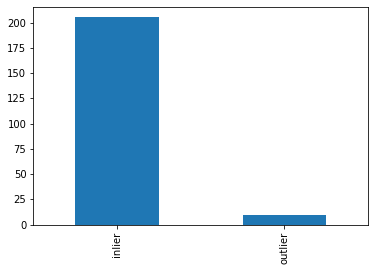

In [251]:
import matplotlib.pyplot as plt

glass['outlier'] = glass['lof'].apply(lambda x: 'outlier' if x > otsu else 'inlier')
glass['outlier'].value_counts().plot(kind='bar')
plt.show()

In [252]:
# method referenced from https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
glass['outlier'] = glass['lof'].apply(lambda x: 'outlier' if x > otsu else 'inlier')
glass = glass.sort_values(by=['lof'], ascending=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(glass)

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe       lof  \
177  1.51937  13.79  2.41  1.19  72.76  0.00   9.77  0.00  0.00  0.866760   
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00  0.895737   
182  1.51916  14.15  0.00  2.09  72.74  0.00  10.88  0.00  0.00  0.902217   
192  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09  0.902986   
42   1.51779  13.21  3.39  1.33  72.76  0.59   8.59  0.00  0.00  0.912370   
83   1.51594  13.09  3.52  1.55  72.87  0.68   8.05  0.00  0.09  0.917237   
194  1.51683  14.56  0.00  1.98  73.29  0.00   8.52  1.57  0.07  0.924366   
43   1.52210  13.73  3.84  0.72  71.76  0.17   9.74  0.00  0.00  0.925160   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00  0.925502   
38   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00  0.925502   
120  1.51844  13.25  3.76  1.32  72.40  0.58   8.42  0.00  0.00  0.932461   
99   1.51811  12.96  2.96  1.43  72.92  0.60   8.79  0.14  0.00  0.935411   
178  1.51829  14.46  2.24  1.62  72.38  0.00   9.26  0.00  0.00  0.937821   
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10  0.939890   
205  1.51732  14.95  0.00  1.80  72.99  0.00   8.61  1.55  0.00  0.943089   
175  1.52119  12.97  0.33  1.51  73.39  0.13  11.27  0.00  0.28  0.945816   
34   1.51783  12.69  3.54  1.34  72.95  0.57   8.75  0.00  0.00  0.948105   
57   1.51824  12.87  3.48  1.29  72.95  0.60   8.43  0.00  0.00  0.948220   
153  1.51610  13.42  3.40  1.22  72.69  0.59   8.32  0.00  0.00  0.949126   
154  1.51694  12.86  3.58  1.31  72.61  0.61   8.79  0.00  0.00  0.950150   
37   1.51797  12.74  3.48  1.35  72.96  0.64   8.68  0.00  0.00  0.951661   
197  1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00  0.956685   
199  1.51609  15.01  0.00  2.51  73.05  0.05   8.83  0.53  0.00  0.956685   
72   1.51593  13.09  3.59  1.52  73.10  0.67   7.83  0.00  0.00  0.958516   
45   1.51900  13.49  3.48  1.35  71.95  0.55   9.00  0.00  0.00  0.958809   
137  1.51711  12.89  3.62  1.57  72.96  0.61   8.11  0.00  0.00  0.959116   
11   1.51763  12.80  3.66  1.27  73.01  0.60   8.56  0.00  0.00  0.959951   
85   1.51625  13.36  3.58  1.49  72.72  0.45   8.21  0.00  0.00  0.961550   
167  1.51969  12.64  0.00  1.65  73.75  0.38  11.53  0.00  0.00  0.961600   
196  1.51556  13.87  0.00  2.54  73.23  0.14   9.41  0.81  0.01  0.962465   
24   1.51720  13.38  3.50  1.15  72.85  0.50   8.43  0.00  0.00  0.962762   
123  1.51707  13.48  3.48  1.71  72.52  0.62   7.99  0.00  0.00  0.964397   
130  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00  0.00  0.968095   
148  1.51670  13.24  3.57  1.38  72.70  0.56   8.44  0.00  0.10  0.975369   
26   1.51793  13.21  3.48  1.41  72.64  0.59   8.43  0.00  0.00  0.975369   
139  1.51674  12.87  3.56  1.64  73.14  0.65   7.99  0.00  0.00  0.976381   
31   1.51747  12.84  3.50  1.14  73.27  0.56   8.55  0.00  0.00  0.982530   
4    1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00  0.982751   
49   1.51898  13.58  3.35  1.23  72.08  0.59   8.91  0.00  0.00  0.983818   
7    1.51756  13.15  3.61  1.05  73.24  0.57   8.24  0.00  0.00  0.984582   
68   1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.00  0.16  0.985357   
67   1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.00  0.17  0.985357   
58   1.51754  13.48  3.74  1.17  72.99  0.59   8.03  0.00  0.00  0.985363   
65   1.52099  13.69  3.59  1.12  71.96  0.09   9.40  0.00  0.00  0.986688   
213  1.51711  14.23  0.00  2.08  73.36  0.00   8.62  1.67  0.00  0.987731   
212  1.51651  14.38  0.00  1.94  73.61  0.00   8.48  1.57  0.00  0.987731   
208  1.51640  14.37  0.00  2.74  72.85  0.00   9.45  0.54  0.00  0.989118   
27   1.51721  12.87  3.48  1.33  73.04  0.56   8.43  0.00  0.00  0.990749   
30   1.51768  12.65  3.56  1.30  73.08  0.61   8.69  0.00  0.14  0.991075   
48   1.52223  13.21  3.77  0.79  71.99  0.13  10.02  0.00  0.00  0.994894   
76   1.51645  13.44  3.61  1.54  72.39  0.66   8.03  0.00  0.00  0.996494   
140  1

OTSU METHOD REFERENCED FROM: https://muthu.co/otsus-method-for-image-thresholding-explained-and-implemented/